# Задание 1 - часть 1 - Квадратик



In [1]:
a = 10
rect = matrix([
    (0,0),
    (a,0),
    (a,a),
    (0,a),
    (0,0)
])

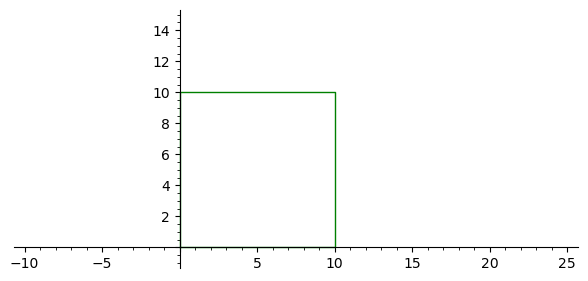

In [2]:
show(line(rect, color='green'), aspect_ratio=1, ymax = 15, xmax=25, xmin = -10, ymin=-1 )

In [3]:
alpha = math.radians(60)
rotate = matrix([
    (cos(alpha), sin(alpha)),
    (-sin(alpha), cos(alpha))
])

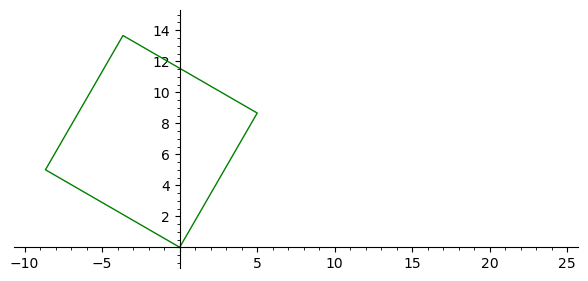

In [4]:
rotated_rect = rect*rotate
show(line(rotated_rect, color='green'), aspect_ratio=1, ymax = 15, xmax=25, xmin = -10, ymin=-1 )

In [5]:
def coord_2d23d(m, default_z=1):
    m = matrix([ [m0, m1, default_z ] for [ m0, m1 ] in  m ])
    return m

def coord_3d22d(m):
    m = matrix([ [m0, m1] for [m0, m1, _] in  m ])
    return m

In [6]:
def move_2d_fig(coord, dx, dy):
    coord_3d = coord_2d23d(coord)
    move_matr = matrix([
        [1, 0, 0],
        [0, 1, 0],
        [dx, dy, 1],
    ])
    moved_figure3d = coord_3d * move_matr
    new_fig = coord_3d22d( moved_figure3d )
    return new_fig
    

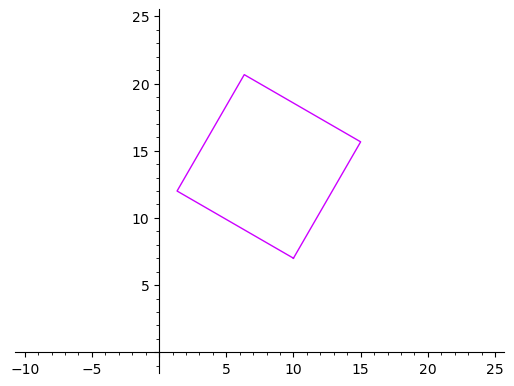

In [7]:
moved_rotated_rect = move_2d_fig(rotated_rect, dx=10, dy=7)
show(line(moved_rotated_rect, hue=0.8), aspect_ratio=1, ymax = 25, xmax=25, xmin = -10, ymin=-1)

# Задание 1 - часть 2 - Исследование функции
**Вариант: 2**   
Для заданной формулой функции найти:
 1. Область определения функции.
 2. Является ли функция четной или нечетной, является ли периодической.
 3. Точки пересечения графика с осями координат.
 4. Промежутки знакопостоянства.
 5. Промежутки возрастания и убывания.
 6. Точки экстремума и значения в этих точках.
 7. Непрерывность. Наличие точек разрыва и их классификация.
 8. Асимптоты.

Построить график функции, асимптоты, промежутки знакопостоянства. (см. папку с материалами).<br>
Необходимо также сделать минимальное, но оформление решения, а не просто набор ответов.

In [8]:
f(x) = sqrt(abs(3*x^3 + 2*x^2 - 10*x)) / (4*x)

In [9]:
show(f)

x |--> 1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x

## Область определения и график функции

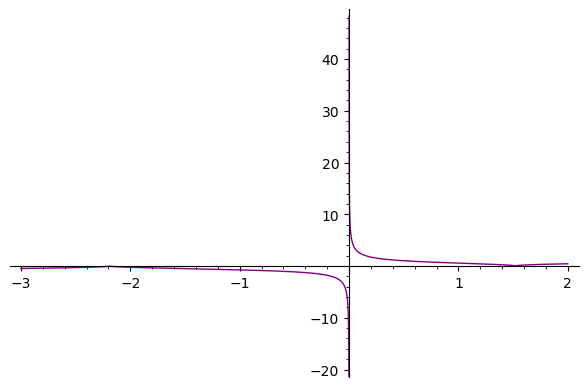

In [10]:
plot(f, ymin=-20, xmax=2, xmin=-3, color='purple', exclude=[0])

По описанию функции мы видим, что в область определения не входит $ x = 0 $, а под корнем всегда положительные значения из-за модуля.
$ D(f) = \{ x \ne 0 \} $ 

## Четность, нечетность и переодичность

### Четность

In [11]:
show(f(x) == f(-x)) 

1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x == -1/4*sqrt(abs(-3*x^3 + 2*x^2 + 10*x))/x

Всетаки решим проверить равество функций после постановки $ x $ и $ -x $

In [12]:
show((f(x)-f(-x)).expand().simplify())

1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x + 1/4*sqrt(abs(3*x^3 - 2*x^2 - 10*x))/x

### Нечетность

In [13]:
show(-f(x) == f(-x)) 

-1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x == -1/4*sqrt(abs(-3*x^3 + 2*x^2 + 10*x))/x

In [14]:
show((-f(x)-f(-x) == 0).expand().simplify())

-1/4*sqrt(abs(3*x^3 + 2*x^2 - 10*x))/x + 1/4*sqrt(abs(3*x^3 - 2*x^2 - 10*x))/x == 0

### Переодичность

In [15]:
var('x T')
period_try = f(x) - f(x + T)
show( solve(period_try, T) )


[T == x*(sqrt(abs(3*T^3 + (9*T + 2)*x^2 + 3*x^3 + 2*T^2 + (9*T^2 + 4*T - 10)*x - 10*T)) - sqrt(abs(3*x^3 + 2*x^2 - 10*x)))/sqrt(abs(3*x^3 + 2*x^2 - 10*x))]

Однозначно вывести $ T $ не удалось, значит и не переодическая.

***Функция не является переодчной, четной и нечетной.***

## Точки пересечения графика с осями координат

In [16]:
show( solve(f(x),x) ) # Пересечение с осью абсцисс (кроме )

[x == -1/3*sqrt(31) - 1/3, x == 1/3*sqrt(31) - 1/3, x == 0]

Ось ординат функция не перескает, так как не позволяет область определения.

## Промежутки знакопостоянства

Очевидно, что знак меняется при переходе $ x = 0 $, так как числитель всегда положителен, то все зависит от $ 4x $.

In [17]:
roots = [-1/3*sqrt(31) - 1/3, 1/3*sqrt(31) - 1/3, 0]

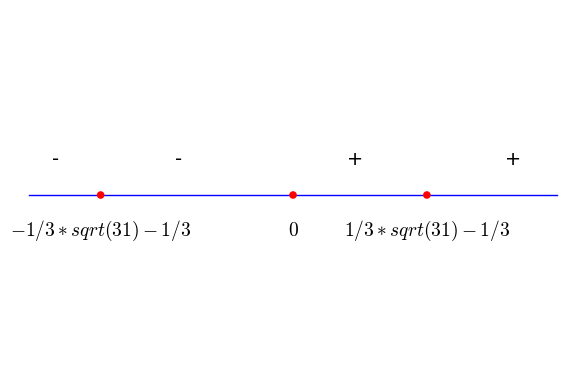

In [18]:
intervals_of_constancy = plot(0, xmin=-3, xmax=3, ymin=-0.5, ymax=0.5)

for r in roots:
    intervals_of_constancy  += point((r, 0), color="red", size=30, zorder=10)
    intervals_of_constancy  += text("${}$".format(r), (r, -0.1), color="black", fontsize=14)

y_margin = 0.1 
intervals_of_constancy  += text("-", (-2.7, y_margin), color="black", fontsize=14) 
intervals_of_constancy  += text("-", (-1.3, y_margin), color="black", fontsize=14)
intervals_of_constancy  += text("+", (0.7, y_margin), color="black", fontsize=14) 
intervals_of_constancy  += text("+", (2.5 , y_margin), color="black", fontsize=14)


intervals_of_constancy.show(axes=False)

## Промежутки возрастания и убывания

In [19]:
solve( f.diff(x), x )

[x == -1/3*sqrt(31) - 1/3, x == 1/3*sqrt(31) - 1/3, x == -1/3*I*sqrt(10)*sqrt(3), x == 1/3*I*sqrt(10)*sqrt(3), x == 0]

In [20]:
for r in roots:
    show(r)
    print("fdx(r + 0.1) > 0 : {}".format(f.diff(x)(r + 0.1).n() > 0))
    print("fdx(r - 0.1) > 0 : {}".format(f.diff(x)(r - 0.1).n() > 0))

-1/3*sqrt(31) - 1/3

fdx(r + 0.1) > 0 : False
fdx(r - 0.1) > 0 : True


1/3*sqrt(31) - 1/3

fdx(r + 0.1) > 0 : True
fdx(r - 0.1) > 0 : False


0

fdx(r + 0.1) > 0 : False
fdx(r - 0.1) > 0 : False


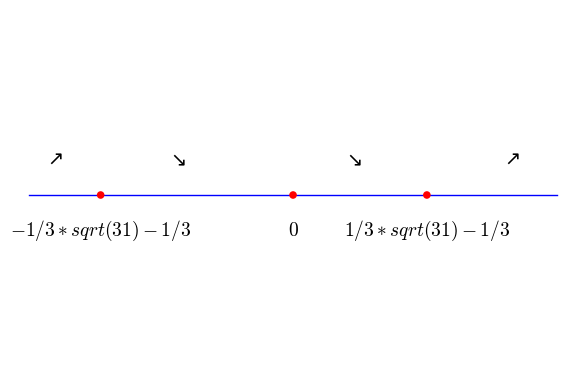

In [21]:
intervals_of_constancy = plot(0, xmin=-3, xmax=3, ymin=-0.5, ymax=0.5)

for r in roots:
    intervals_of_constancy  += point((r, 0), color="red", size=30, zorder=10)
    intervals_of_constancy  += text("${}$".format(r), (r, -0.1), color="black", fontsize=14)

y_margin = 0.1 
intervals_of_constancy  += text("↗", (-2.7, y_margin), color="black", fontsize=14) 
intervals_of_constancy  += text("↘", (-1.3, y_margin), color="black", fontsize=14)
intervals_of_constancy  += text("↘", (0.7, y_margin), color="black", fontsize=14) 
intervals_of_constancy  += text("↗", (2.5 , y_margin), color="black", fontsize=14)


intervals_of_constancy.show(axes=False)

# Точки экстремума
Расмматриваем корни производной:
 - в 0 функции не существует; 
 - две других являются точками локального максимума и минимума соотвественно (слева на право).

# Точки разрыва
Точка разрыва в 0 для ее классификации посчитаем правый и левый предел.

In [22]:
lim(f(x), x=0, dir="right" )

+Infinity

In [23]:
lim(f(x), x=0, dir="left" )

-Infinity

***Эта точка разрыва второго рода.***

## Асимтоты
Начнем с вертикальных асмптот, в точке $ x = 0 $ оба предела бесконечны, значит $ x = 0 $ вертикальная асмптота.
Далее проверяем наклонные асмптоты:

In [24]:
lim( f(x)/x, x=+oo )

0

In [25]:
k = lim( f(x)/x, x=+oo )
lim( f(x)-k*x, x=+oo )

+Infinity

Так как предел не конечен, то наклонные асимптоты отсутствуют.

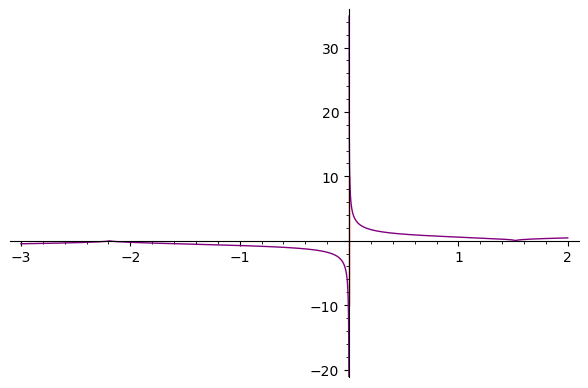

In [26]:
v = [ (0,i) for i in srange(-10, 10, 0.1) ]
line(v, color='red') + plot(f, ymin=-20, xmax=2, xmin=-3, color='purple', exclude=[0])